# **Domain Specific Analysis**

## Objectives

*   Answer business requirement 1: 
    * The client is interested to understand the patterns between an airplanes design features and its Performance features, so that the client can learn which are the most relevant variables to consider when choosing **Engine Type** (jet, piston or propjet) in the design process of a new airplane.

## Inputs

* outputs/datasets/collection/airplane_performance_study.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design'

---

# Load Data

* Dropping the columns with Meta Data 'Model' and 'Company' since these are identifier variables not needed for the study
* Dropping the two Engine "size" features 'THR' (Force with unit lbf) and 'SHP' (Power with unit SHP). The "THR" column is occupied (otherwise showing NaN) when the "Engine Type" is categorized with Jet and the same goes for the "SHP" when the "Engine Type" is categorized with piston or propjet. These two features () are interesting from an Aircraft Design perspective but since these are different quantities with different units they become difficult/awkward to compare with each other.

In [4]:
import pandas as pd
df = pd.read_csv("/workspace/data-driven-design/outputs/datasets/collection/airplane_performance_study.csv")
df.head(10)


,Model,Company,Wing_Span,Length,Height,Multi_Engine,TP_mods,Engine_Type,THR,SHP,...,Vstall,Range,Hmax,Hmax_(One),ROC,ROC_(One),Vlo,Slo,Vl,Sl
0,15 AC Sedan,Aeronca,37.416667,25.250000,10.250000,False,False,0,NaN,145.0,...,46.0,370.0,13000.0,13000.0,450.0,450.0,900.0,391.970247,1300.0,257.745075
1,11 CC Super Chief,Aeronca,36.083333,20.583333,8.750000,False,False,0,NaN,85.0,...,44.0,190.0,12300.0,12300.0,600.0,600.0,720.0,26.247647,800.0,225.324824
2,7 CCM Champ,Aeronca,35.000000,21.416667,8.583333,False,False,0,NaN,90.0,...,37.0,210.0,16000.0,16000.0,650.0,650.0,475.0,363.139711,850.0,585.751317
3,7 DC Champ,Aeronca,35.000000,21.416667,8.583333,False,False,0,NaN,85.0,...,37.0,210.0,13000.0,13000.0,620.0,620.0,500.0,407.797297,850.0,642.046166
4,7 AC Champ,Aeronca,35.000000,21.416667,8.750000,False,False,0,NaN,65.0,...,33.0,175.0,12500.0,12500.0,370.0,370.0,632.0,297.056192,885.0,329.571813
5,11 AC Chief,Aeronca,36.083333,20.333333,8.750000,False,False,0,NaN,65.0,...,33.0,180.0,11000.0,11000.0,360.0,360.0,583.0,393.226454,880.0,542.445142
6,PA-60-700P Aerostar (preliminary),Aerostar Aircraft Corporation,36.666667,34.833333,12.083333,True,False,0,NaN,350.0,...,80.0,868.0,25000.0,14500.0,1820.0,320.0,3080.0,1950.000000,2100.0,1425.000000
7,PA-602P Aerostar,Aerostar Aircraft Corporation,36.583333,34.750000,12.083333,True,False,0,NaN,290.0,...,77.0,1020.0,28000.0,12900.0,1755.0,302.0,2250.0,1800.000000,2076.0,1217.000000
8,PA-601P pressurized Aerostar ('77 service ceil...,Aerostar Aircraft Corporation,36.666667,34.833333,12.083333,True,False,0,NaN,290.0,...,77.0,1101.0,25000.0,8800.0,1460.0,240.0,2490.0,1900.000000,2030.0,1230.000000
9,PA-601B turbochg Aerostar (prior'80=less perf),Aerostar Aircraft Corporation,36.666667,34.833333,12.083333,True,False,0,NaN,290.0,...,77.0,1174.0,30000.0,8800.0,1460.0,240.0,2490.0,1900.000000,2030.0,1230.000000


---

# Data Exploration from the domain specific perspective of Airplane Design and Performance

## Mean and extremes in the data set

We are interested to get more familiar with the dataset and to see if we can pin which airplanes that constitutes the most average and extremes in the data set. 

Note that the the boolean values for Multi Engine and TP mods are treated as 1 (for True) and 0 (for False) meaning that the mean is the average of these boolean values so that a mean opf 0.5 would mean eaually many True and False instances and for example a mean of 0.6 would be a few more True than False.

The Categorical feature Engine Type has three values 0 (for Jet), 1 (for piston) and 2 (for propjet). The mean is calculated in the same fashion here albeit the intepretation becomes more difficult since a mean of 1 could be both zero or all having the engine type of jet prop.
Consider how to do with the categorical values (Multi_Engine, TP_mods, Engine_Type) as well as those dependent on the categorical values (TP mods, THR and SHP, Hmax (One) and ROC(One)).

In [5]:
import pandas as pd

# Assuming df is defined and contains the relevant features and company/model columns
# Create an empty DataFrame with columns showing what I want to display
columns = ['FEATURE', 'MIN_model', 'MIN_company', 'MIN_value', 
           'MEAN_model', 'MEAN_company', 'MEAN_value', 
           'MAX_model', 'MAX_company', 'MAX_value']
df_summary_stats = pd.DataFrame(columns=columns)

# Fill the 'FEATURE' column with all relevant features
df_summary_stats['FEATURE'] = ['Wing_Span', 'Length', 'Height', 
                                'Multi_Engine', 'TP_mods', 
                                'Engine_Type', 'THR', 'SHP', 
                                'AUW', 'MEW', 'FW', 'Vmax', 
                                'Vcruise', 'Vstall', 'Range', 
                                'Hmax', 'Hmax_(One)', 'ROC', 
                                'ROC_(One)', 'Vlo', 'Slo', 'Vl', 'Sl']

# Calculate statistics and fill df_summary_stats
for feature in df_summary_stats['FEATURE']:
    if feature in df.columns:
        # Minimum statistics
        min_value = df[feature].min()
        min_index = df[feature].idxmin()
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MIN_model'] = df.loc[min_index, 'Model']
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MIN_company'] = df.loc[min_index, 'Company']
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MIN_value'] = min_value

        # Mean statistics
        mean_value = df[feature].mean()
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MEAN_value'] = mean_value
        
        # Finding the closest value to the mean
        closest_index = (df[feature] - mean_value).abs().idxmin()
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MEAN_model'] = df.loc[closest_index, 'Model']
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MEAN_company'] = df.loc[closest_index, 'Company']

        # Maximum statistics
        max_value = df[feature].max()
        max_index = df[feature].idxmax()
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MAX_model'] = df.loc[max_index, 'Model']
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MAX_company'] = df.loc[max_index, 'Company']
        df_summary_stats.loc[df_summary_stats['FEATURE'] == feature, 'MAX_value'] = max_value
    else:
        print(f"Feature '{feature}' not found in the DataFrame.")

df_summary_stats


,FEATURE,MIN_model,MIN_company,MIN_value,MEAN_model,MEAN_company,MEAN_value,MAX_model,MAX_company,MAX_value
0,Wing_Span,182S ('97 & up),Cessna Aircraft Company,16.0,TBM 850,EADS Socata Aircraft,41.355815,Global 7500,Bombardier Aerospace Business Aircraft,104.0
1,Length,M18 Mite,Mooney Aircraft,17.583333,PA-31P-350 Mojave,Piper Aircraft,34.482118,Lineage 1000,Embraer Aircraft - Empresa Brasileira,118.916667
2,Height,A-2,Aircoupe-Alon,5.083333,421 - A & B,Cessna Aircraft Company,11.347784,Lineage 1000,Embraer Aircraft - Empresa Brasileira,33.75
3,Multi_Engine,15 AC Sedan,Aeronca,False,15 AC Sedan,Aeronca,0.477246,PA-60-700P Aerostar (preliminary),Aerostar Aircraft Corporation,True
4,TP_mods,15 AC Sedan,Aeronca,False,15 AC Sedan,Aeronca,0.068845,Superstar II (600 series Aerostar),Machen Inc.,True
5,Engine_Type,15 AC Sedan,Aeronca,0,15 AC Sedan,Aeronca,0.469078,Beechjet 400 (400A has increased weights),Beechcraft (Hawker Beechcraft),2
6,THR,Acclaim Ultra (M20V),Mooney Aircraft,280.0,Hawker 750,Hawker Beechcraft,5458.318182,Global 7500,Bombardier Aerospace Business Aircraft,18920.0
7,SHP,7ACA,American Champion Aircraft Corporation,60.0,58 P Baron-press.('77 hgt=9/6) (range based on...,Beechcraft (Hawker Beechcraft),314.835704,GI (G-159) ceiling quoted w/APU,Gulfstream Aerospace,1950.0
8,AUW,M18 Mite,Mooney Aircraft,850.0,Merlin II A,Fairchild M7 Aerospace,9754.535589,Lineage 1000,Embraer Aircraft - Empresa Brasileira,120152.0
9,MEW,M18 Mite,Mooney Aircraft,575.0,"MU-2B,-2D (-2D=9,350 gross weight)",Mitsubishi Diamond,5724.573852,Lineage 1000,Embraer Aircraft - Empresa Brasileira,70841.0


---

## Cessna vs. Piper

Already Kaggle where we retrieved the data we could glean info about the data without lifting a finger. We see that the data (that will be transformed into categorical data) currently is unbalanced.

We have choosen here to pit two of the largest general aviation manufacturers Cessna with 24% of the data points and Piper standing for 13% of the datapoints against each other. These are also the two companies with the largest part of the data set. We have choosen a selection of key performance features and plotted them against Wing Span and the All Upp Weight (AUW).

Piper aircrafts appear to have their airplanes more focust in both Wing span and weight than Cessna so we only compare these intervalls where both companies are represented with data points. Perhaps we should cut of the intervall even before the linear regression takes place!

Interestingly enough it appears that the Pipers linear regression line have a pivot point around the middles so that they are better than Cessnas but worse than Cessna for the smaller wingspans and this pattern seems to be consistent across all the plotted performance except for perhaps Hmax. Interestingly enogh the opposite is true, higher weights makes Cessna win over Piper but lower weights makes Piper win over Cessna.

I think this is however becasue of the skewed data given becasue Cessnas regression line is influensed by the data outside of Pipers data range and if the data is not completely linear then logically that would have a large effect on the gradient of the regression line!

Is the data linear? Aerodynamic Scale factors (linked to RE-nr) would suggest that Performance would increase more than a linear increase as Wingspan increases.
Structural Scale effects would rather suggest the opposite, who wins!?

Observation gives that the performance parameters appear to be relativly linear for Wing Span however less so for Weight where the data is getting more flat as weight increases.

Despite having domain specific knowledge about Aircraft performance I do not see any obvious reason for this data-pattern!

<img src="/workspace/data-driven-design/images_notebook/cessna_vs_piper_kaggle.png" alt="Screenshot showing distribution between Cessna and Piper" height="200" />

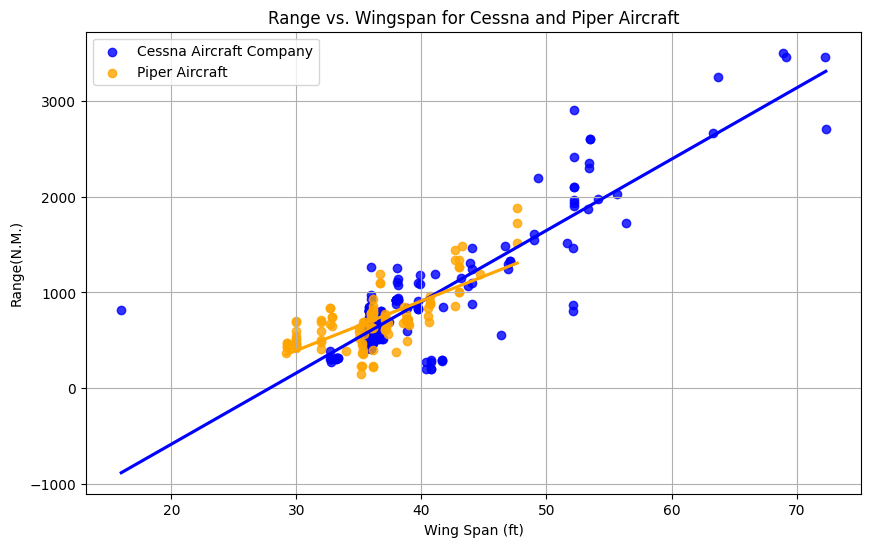

Cessna Aircraft Company - Coefficient: 74.33, Intercept: -2070.29
Piper Aircraft - Coefficient: 51.63, Intercept: -1154.59


(141.0, 3505.0)

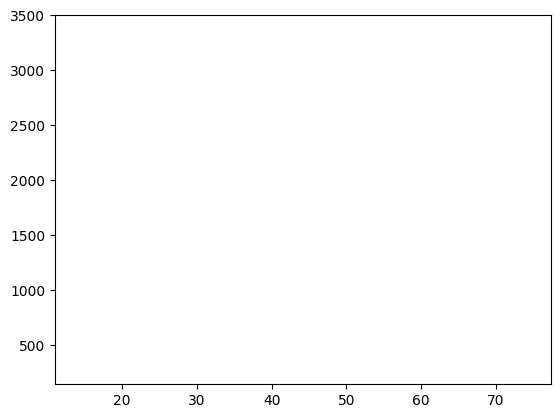

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# Step 1: Filter data for Cessna and Piper
filtered_df = df[df['Company'].isin(['Cessna Aircraft Company', 'Piper Aircraft'])]

# Step 2: Create regression plots
plt.figure(figsize=(10, 6))

# Plot using Seaborn's regression plot
sns.regplot(data=filtered_df[filtered_df['Company'] == 'Cessna Aircraft Company'],
            x='Wing_Span', y='Range',
            label='Cessna Aircraft Company', color='blue', ci=None)

sns.regplot(data=filtered_df[filtered_df['Company'] == 'Piper Aircraft'],
            x='Wing_Span', y='Range',
            label='Piper Aircraft', color='orange', ci=None)

plt.title('Range vs. Wingspan for Cessna and Piper Aircraft')
plt.xlabel('Wing Span (ft)')
plt.ylabel('Range(N.M.)')
plt.legend()
plt.grid()
plt.show()

# Optional: Compare regression coefficients
for company in ['Cessna Aircraft Company', 'Piper Aircraft']:
    X = filtered_df[filtered_df['Company'] == company]['Wing_Span'].values.reshape(-1, 1)
    y = filtered_df[filtered_df['Company'] == company]['Range'].values
    model = LinearRegression().fit(X, y)
    print(f"{company} - Coefficient: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}")

plt.xlim(filtered_df['Wing_Span'].min() - 5, filtered_df['Wing_Span'].max() + 5)
plt.ylim(filtered_df['Range'].min() - 5, filtered_df['Range'].max() + 5)



In [7]:
filtered_df = df[df['Company'].isin(['Cessna Aircraft Company', 'Piper Aircraft'])]
print(filtered_df)

                       Model                  Company  Wing_Span     Length  \
221       Citation Longitude  Cessna Aircraft Company  68.916667  73.166667   
222           750 Citation X  Cessna Aircraft Company  63.750000  72.166667   
223              Citation X+  Cessna Aircraft Company  69.166667  73.583333   
224  Citation Sovereign+ 680  Cessna Aircraft Company  72.250000  63.416667   
225   680 Citation Sovereign  Cessna Aircraft Company  63.333333  63.583333   
..                       ...                      ...        ...        ...   
736            PA-16 Clipper           Piper Aircraft  29.166667  20.083333   
737            PA-14 Cruiser           Piper Aircraft  35.333333  23.083333   
738      PA-12 Super Cruiser           Piper Aircraft  35.333333  22.750000   
739                    PA-11           Piper Aircraft  35.166667  22.333333   
740                  J-3 Cub           Piper Aircraft  35.166667  22.333333   

        Height  Multi_Engine  TP_mods  Engine_Type 

                       Model                  Company  Wing_Span     Length  \
221       Citation Longitude  Cessna Aircraft Company  68.916667  73.166667   
222           750 Citation X  Cessna Aircraft Company  63.750000  72.166667   
223              Citation X+  Cessna Aircraft Company  69.166667  73.583333   
224  Citation Sovereign+ 680  Cessna Aircraft Company  72.250000  63.416667   
225   680 Citation Sovereign  Cessna Aircraft Company  63.333333  63.583333   
..                       ...                      ...        ...        ...   
736            PA-16 Clipper           Piper Aircraft  29.166667  20.083333   
737            PA-14 Cruiser           Piper Aircraft  35.333333  23.083333   
738      PA-12 Super Cruiser           Piper Aircraft  35.333333  22.750000   
739                    PA-11           Piper Aircraft  35.166667  22.333333   
740                  J-3 Cub           Piper Aircraft  35.166667  22.333333   

        Height  Multi_Engine  TP_mods  Engine_Type 

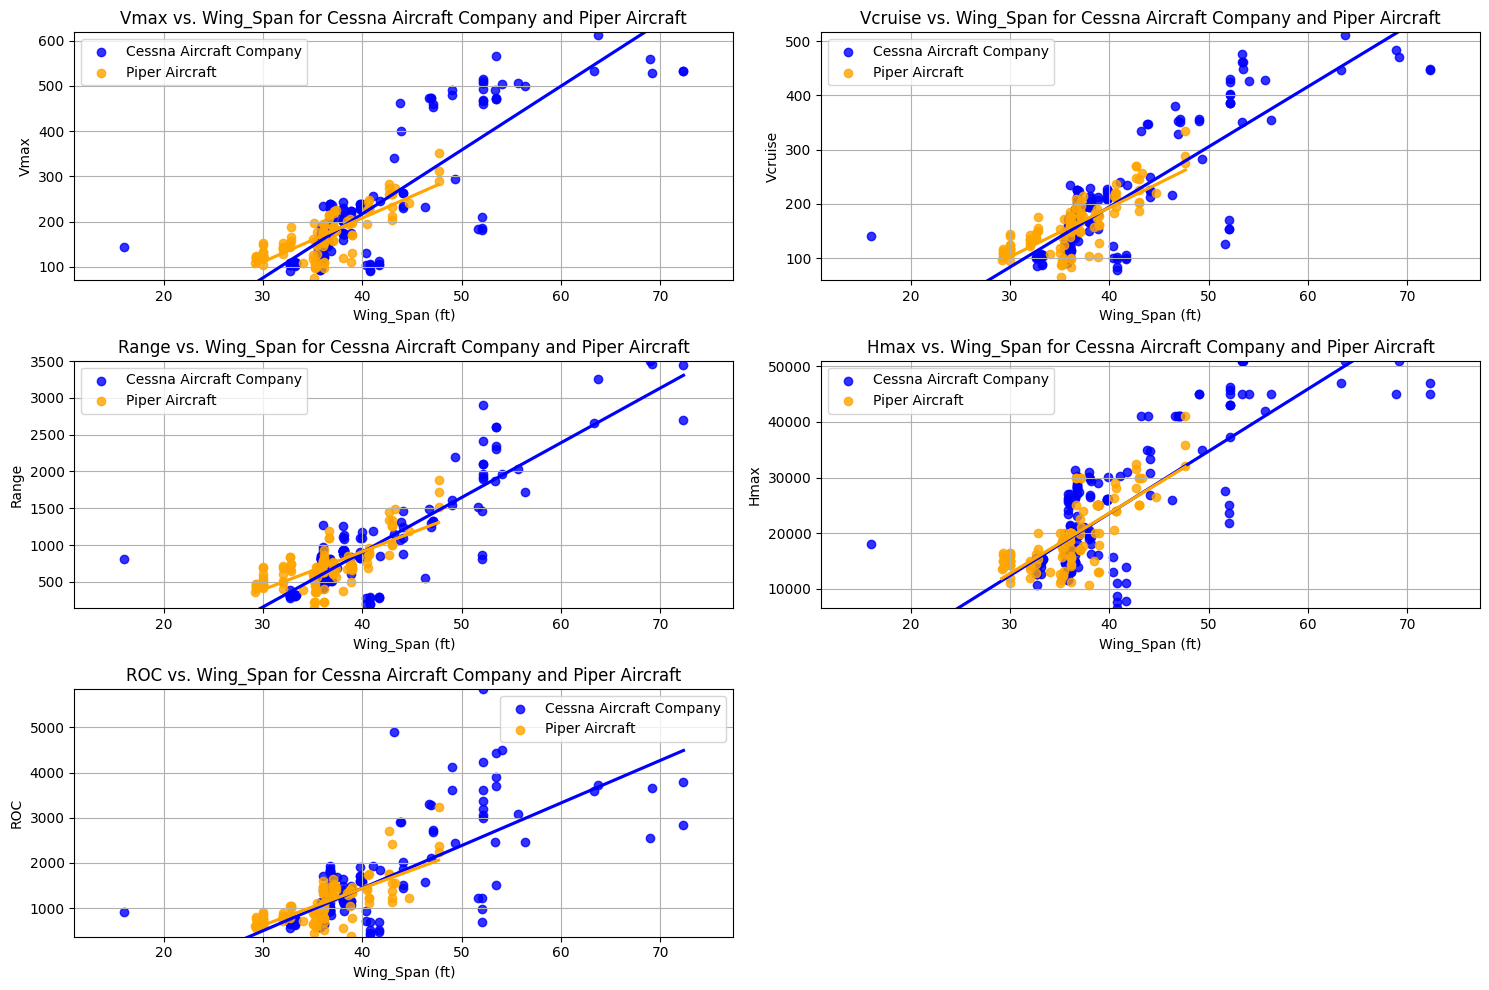

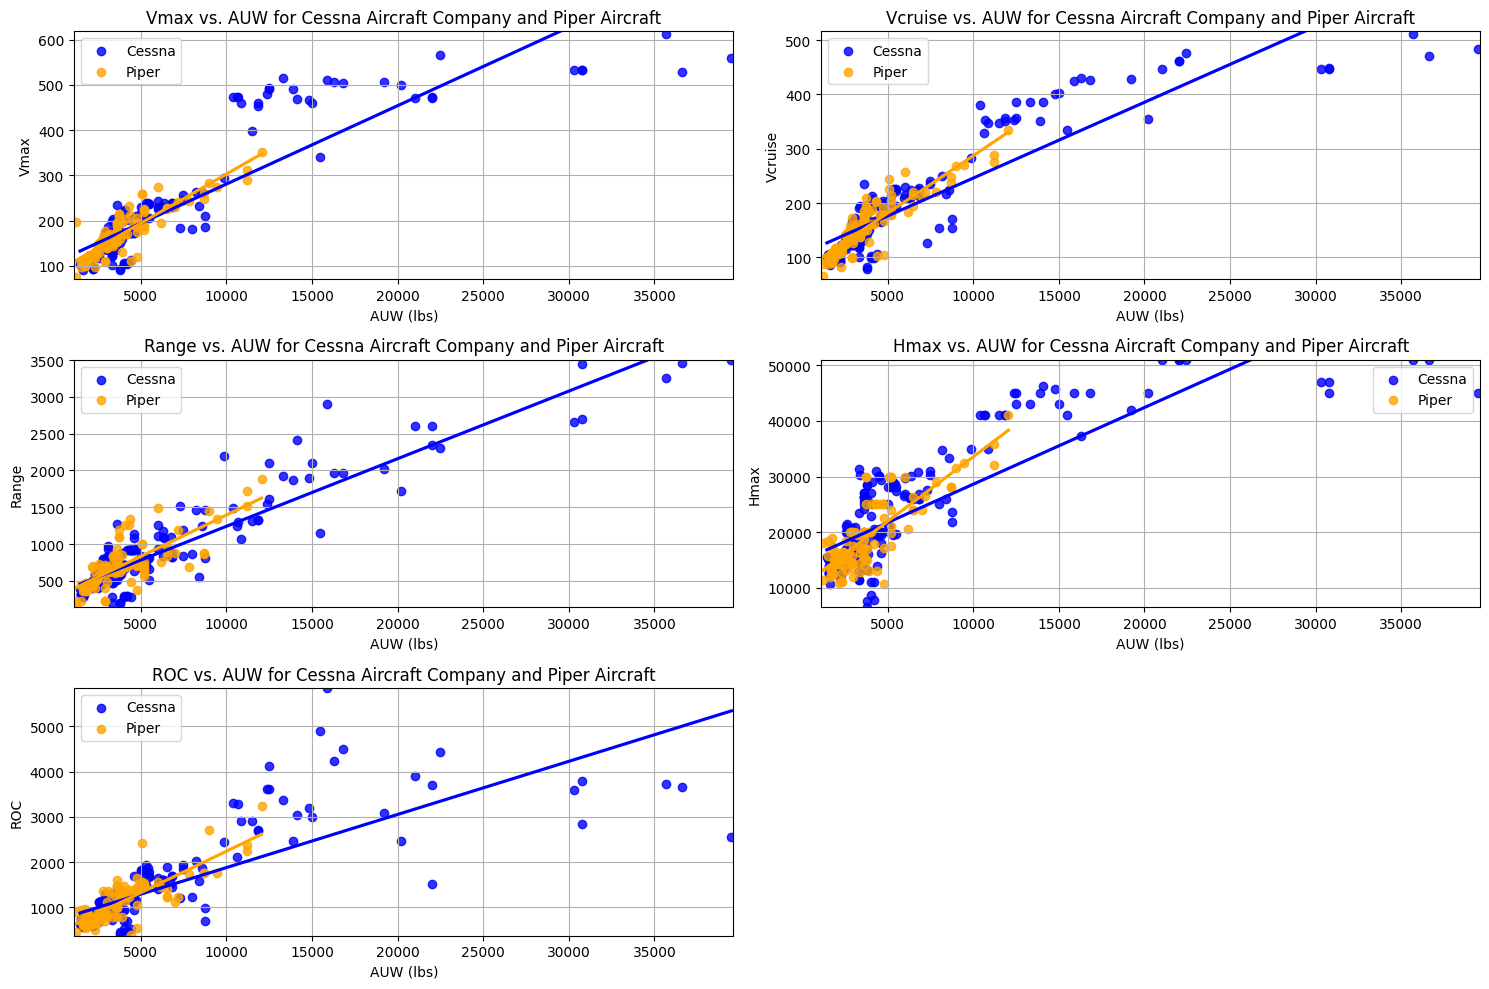

Cessna Aircraft Company (Vmax vs. Wing_Span) - Coefficient: 14.13, Intercept: -348.20
Cessna Aircraft Company (Vmax vs. AUW) - Coefficient: 0.02, Intercept: 107.82
Piper Aircraft (Vmax vs. Wing_Span) - Coefficient: 9.68, Intercept: -179.41
Piper Aircraft (Vmax vs. AUW) - Coefficient: 0.02, Intercept: 85.74
Cessna Aircraft Company (Vcruise vs. Wing_Span) - Coefficient: 11.08, Intercept: -248.87
Cessna Aircraft Company (Vcruise vs. AUW) - Coefficient: 0.01, Intercept: 106.41
Piper Aircraft (Vcruise vs. Wing_Span) - Coefficient: 9.05, Intercept: -169.20
Piper Aircraft (Vcruise vs. AUW) - Coefficient: 0.02, Intercept: 75.52
Cessna Aircraft Company (Range vs. Wing_Span) - Coefficient: 74.33, Intercept: -2070.29
Cessna Aircraft Company (Range vs. AUW) - Coefficient: 0.09, Intercept: 324.24
Piper Aircraft (Range vs. Wing_Span) - Coefficient: 51.63, Intercept: -1154.59
Piper Aircraft (Range vs. AUW) - Coefficient: 0.11, Intercept: 273.87
Cessna Aircraft Company (Hmax vs. Wing_Span) - Coefficie

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming df is defined before this cell and contains the relevant data.

# Step 1: Filter data for Cessna and Piper
filtered_df = df[df['Company'].isin(['Cessna Aircraft Company', 'Piper Aircraft'])]

# Check the filtered DataFrame
print(filtered_df)

# Parameters to plot
parameters = ['Vmax', 'Vcruise', 'Range', 'Hmax', 'ROC']

# Plotting for Wingspan
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters, start=1):
    plt.subplot(3, 2, i)
    
    # Create a scatter plot with regression lines for Cessna
    sns.regplot(data=filtered_df[filtered_df['Company'] == 'Cessna Aircraft Company'],
                x='Wing_Span', y=param,
                label='Cessna Aircraft Company', color='blue', ci=None)

    # Create a scatter plot with regression lines for Piper
    sns.regplot(data=filtered_df[filtered_df['Company'] == 'Piper Aircraft'],
                x='Wing_Span', y=param,
                label='Piper Aircraft', color='orange', ci=None)

    # Set limits
    plt.xlim(filtered_df['Wing_Span'].min() - 5, filtered_df['Wing_Span'].max() + 5)
    plt.ylim(filtered_df[param].min() - 5, filtered_df[param].max() + 5)

    # Add titles and labels
    plt.title(f'{param} vs. Wing_Span for Cessna Aircraft Company and Piper Aircraft')
    plt.xlabel('Wing_Span (ft)')
    plt.ylabel(param)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Plotting for AUW
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters, start=1):
    plt.subplot(3, 2, i)
    
    # Create a scatter plot with regression lines for Cessna
    sns.regplot(data=filtered_df[filtered_df['Company'] == 'Cessna Aircraft Company'],
                x='AUW', y=param,
                label='Cessna', color='blue', ci=None)

    # Create a scatter plot with regression lines for Piper
    sns.regplot(data=filtered_df[filtered_df['Company'] == 'Piper Aircraft'],
                x='AUW', y=param,
                label='Piper', color='orange', ci=None)

    # Set limits
    plt.xlim(filtered_df['AUW'].min() - 100, filtered_df['AUW'].max() + 100)
    plt.ylim(filtered_df[param].min() - 5, filtered_df[param].max() + 5)

    # Add titles and labels
    plt.title(f'{param} vs. AUW for Cessna Aircraft Company and Piper Aircraft')
    plt.xlabel('AUW (lbs)')
    plt.ylabel(param)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Optional: Compare regression coefficients for each parameter
for param in parameters:
    for company in ['Cessna Aircraft Company', 'Piper Aircraft']:
        X_wing_Span = filtered_df[filtered_df['Company'] == company]['Wing_Span'].values.reshape(-1, 1)
        y_param = filtered_df[filtered_df['Company'] == company][param].values
        model_wing_Span = LinearRegression().fit(X_wing_Span, y_param)
        print(f"{company} ({param} vs. Wing_Span) - Coefficient: {model_wing_Span.coef_[0]:.2f}, Intercept: {model_wing_Span.intercept_:.2f}")
        
        X_auw = filtered_df[filtered_df['Company'] == company]['AUW'].values.reshape(-1, 1)
        model_auw = LinearRegression().fit(X_auw, y_param)
        print(f"{company} ({param} vs. AUW) - Coefficient: {model_auw.coef_[0]:.2f}, Intercept: {model_auw.intercept_:.2f}")


                       Model                  Company  Wing_Span     Length  \
221       Citation Longitude  Cessna Aircraft Company  68.916667  73.166667   
222           750 Citation X  Cessna Aircraft Company  63.750000  72.166667   
223              Citation X+  Cessna Aircraft Company  69.166667  73.583333   
224  Citation Sovereign+ 680  Cessna Aircraft Company  72.250000  63.416667   
225   680 Citation Sovereign  Cessna Aircraft Company  63.333333  63.583333   
..                       ...                      ...        ...        ...   
736            PA-16 Clipper           Piper Aircraft  29.166667  20.083333   
737            PA-14 Cruiser           Piper Aircraft  35.333333  23.083333   
738      PA-12 Super Cruiser           Piper Aircraft  35.333333  22.750000   
739                    PA-11           Piper Aircraft  35.166667  22.333333   
740                  J-3 Cub           Piper Aircraft  35.166667  22.333333   

        Height  Multi_Engine  TP_mods  Engine_Type 

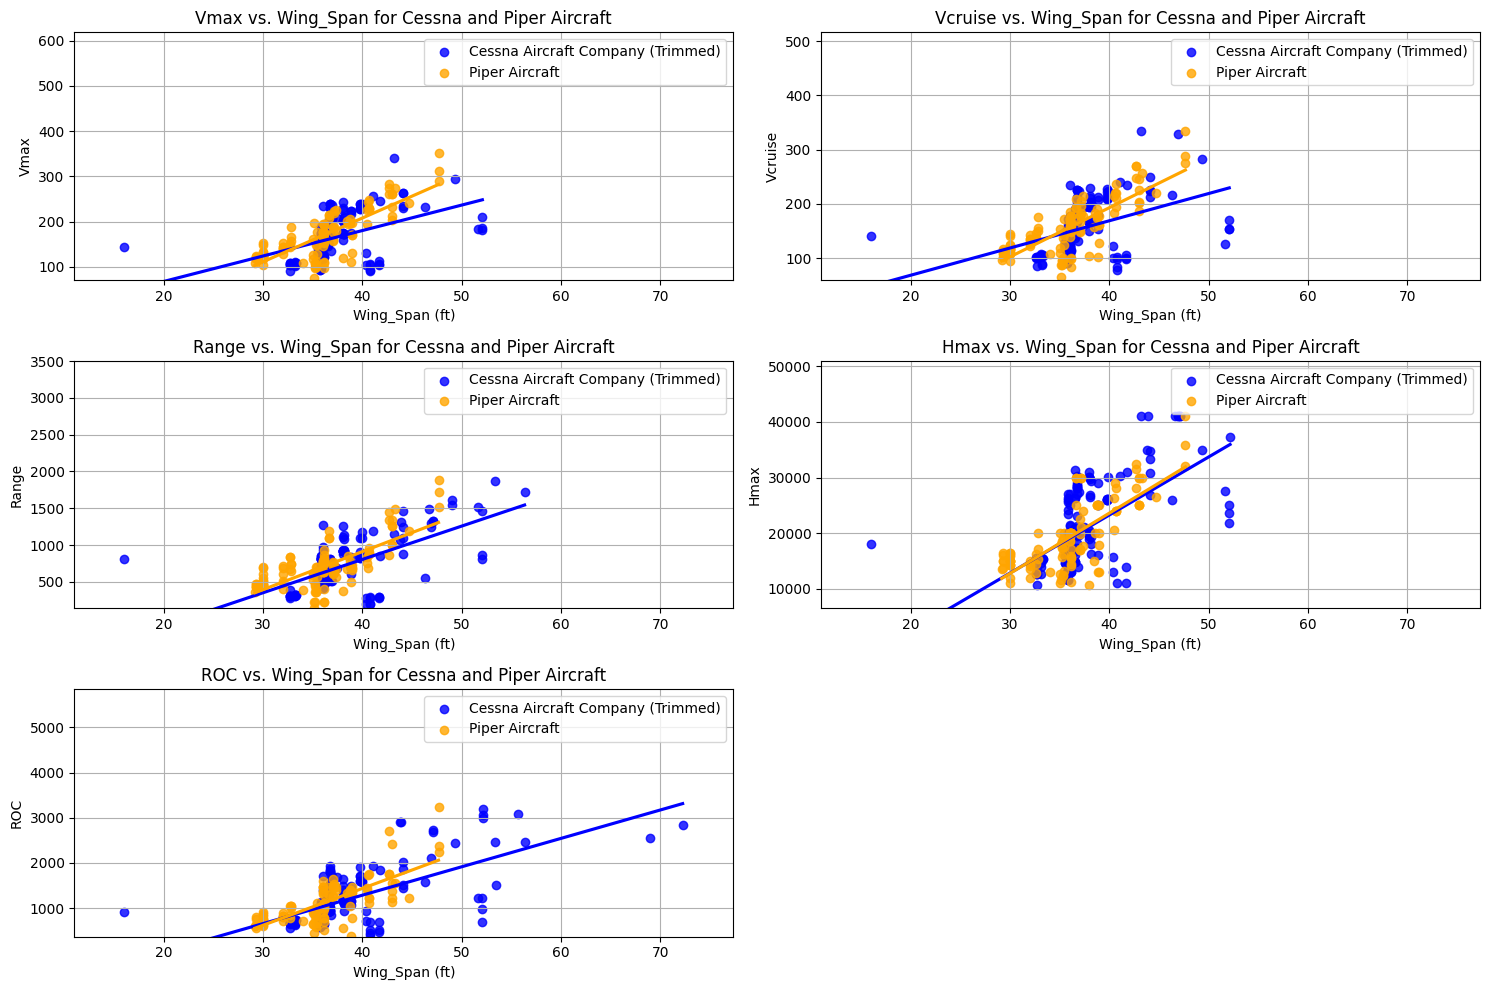

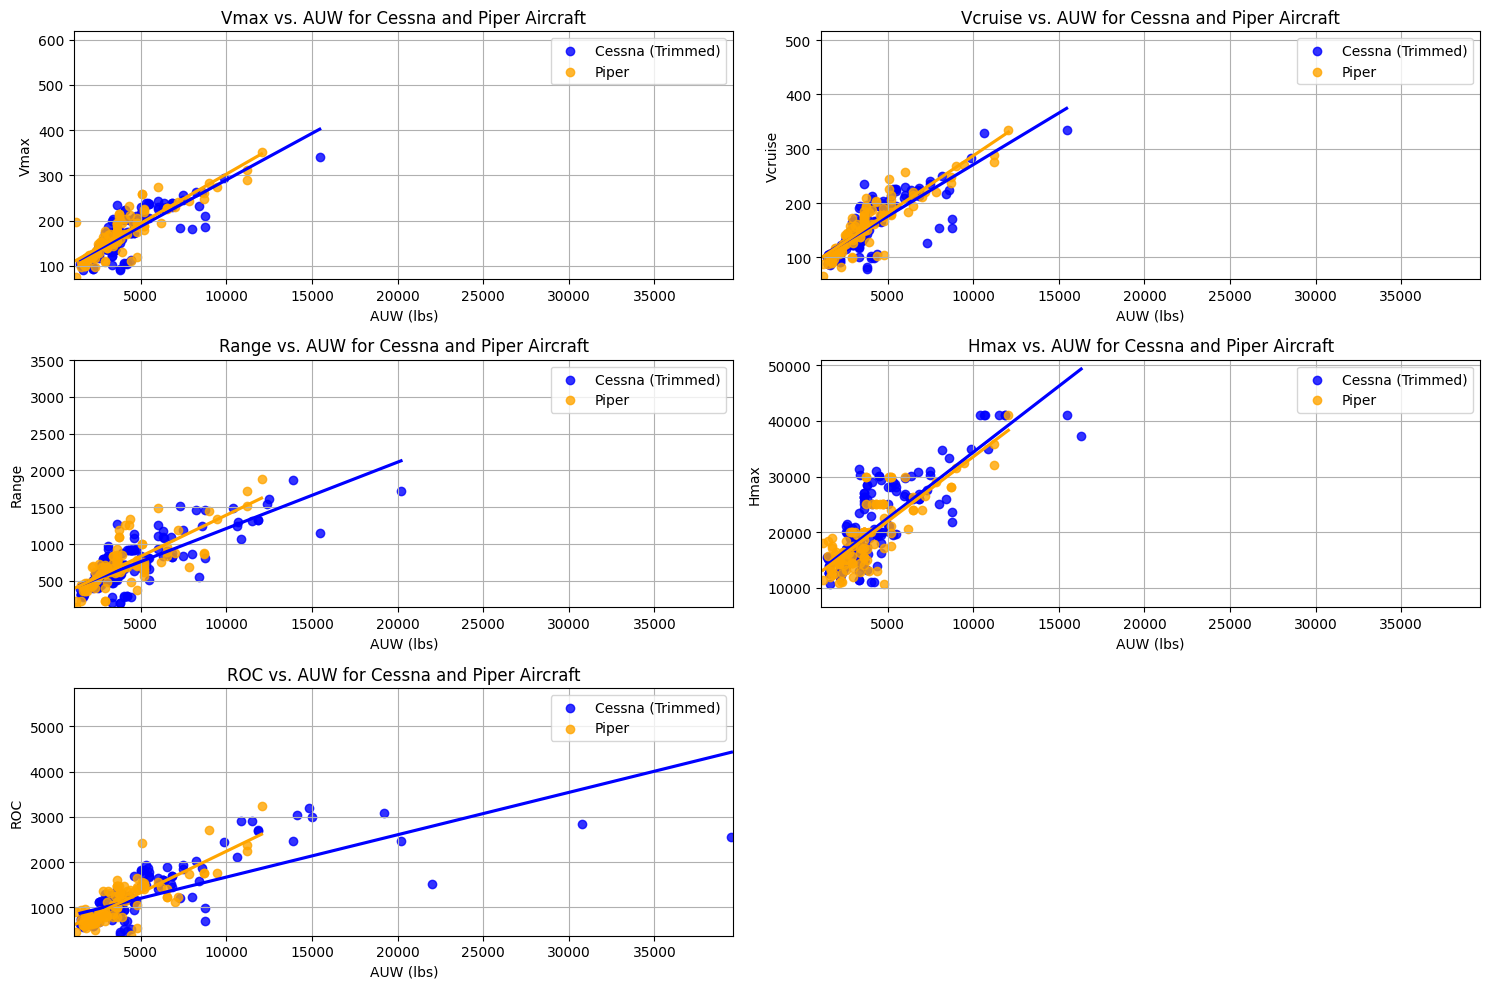

Cessna Aircraft Company (Vmax vs. Wing_Span) - Coefficient: 12.37, Intercept: -287.80
Cessna Aircraft Company (Vmax vs. AUW) - Coefficient: 0.02, Intercept: 98.55
Piper Aircraft (Vmax vs. Wing_Span) - Coefficient: 9.68, Intercept: -179.41
Piper Aircraft (Vmax vs. AUW) - Coefficient: 0.02, Intercept: 85.74
Cessna Aircraft Company (Vcruise vs. Wing_Span) - Coefficient: 9.52, Intercept: -194.61
Cessna Aircraft Company (Vcruise vs. AUW) - Coefficient: 0.01, Intercept: 100.54
Piper Aircraft (Vcruise vs. Wing_Span) - Coefficient: 9.05, Intercept: -169.20
Piper Aircraft (Vcruise vs. AUW) - Coefficient: 0.02, Intercept: 75.52
Cessna Aircraft Company (Range vs. Wing_Span) - Coefficient: 65.70, Intercept: -1759.48
Cessna Aircraft Company (Range vs. AUW) - Coefficient: 0.10, Intercept: 301.65
Piper Aircraft (Range vs. Wing_Span) - Coefficient: 51.63, Intercept: -1154.59
Piper Aircraft (Range vs. AUW) - Coefficient: 0.11, Intercept: 273.87
Cessna Aircraft Company (Hmax vs. Wing_Span) - Coefficient

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming df is defined before this cell and contains the relevant data.

# Step 1: Filter data for Cessna and Piper
filtered_df = df[df['Company'].isin(['Cessna Aircraft Company', 'Piper Aircraft'])]

# Check the filtered DataFrame
print(filtered_df)

# Parameters to plot
parameters = ['Vmax', 'Vcruise', 'Range', 'Hmax', 'ROC']

# Function to trim Cessna data based on Piper data ranges
def trim_cessna_data(piper_data, cessna_data, param):
    piper_min = piper_data[param].min()
    piper_max = piper_data[param].max()
    return cessna_data[(cessna_data[param] >= piper_min) & (cessna_data[param] <= piper_max)]

# Plotting for Wingspan
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters, start=1):
    plt.subplot(3, 2, i)

    # Get Piper data for the parameter
    piper_data = filtered_df[filtered_df['Company'] == 'Piper Aircraft']
    
    # Trim Cessna data for fair comparison
    cessna_data_trimmed = trim_cessna_data(piper_data, 
                                            filtered_df[filtered_df['Company'] == 'Cessna Aircraft Company'], 
                                            param)

    # Create a scatter plot with regression lines for trimmed Cessna
    sns.regplot(data=cessna_data_trimmed,
                x='Wing_Span', y=param,
                label='Cessna Aircraft Company (Trimmed)', color='blue', ci=None)

    # Create a scatter plot with regression lines for Piper
    sns.regplot(data=piper_data,
                x='Wing_Span', y=param,
                label='Piper Aircraft', color='orange', ci=None)

    # Set limits
    plt.xlim(filtered_df['Wing_Span'].min() - 5, filtered_df['Wing_Span'].max() + 5)
    plt.ylim(filtered_df[param].min() - 5, filtered_df[param].max() + 5)

    # Add titles and labels
    plt.title(f'{param} vs. Wing_Span for Cessna and Piper Aircraft')
    plt.xlabel('Wing_Span (ft)')
    plt.ylabel(param)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Plotting for AUW
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters, start=1):
    plt.subplot(3, 2, i)

    # Trim Cessna data for fair comparison based on Piper data
    cessna_data_trimmed_auw = trim_cessna_data(piper_data, 
                                                filtered_df[filtered_df['Company'] == 'Cessna Aircraft Company'], 
                                                param)

    # Create a scatter plot with regression lines for trimmed Cessna
    sns.regplot(data=cessna_data_trimmed_auw,
                x='AUW', y=param,
                label='Cessna (Trimmed)', color='blue', ci=None)

    # Create a scatter plot with regression lines for Piper
    sns.regplot(data=piper_data,
                x='AUW', y=param,
                label='Piper', color='orange', ci=None)

    # Set limits
    plt.xlim(filtered_df['AUW'].min() - 100, filtered_df['AUW'].max() + 100)
    plt.ylim(filtered_df[param].min() - 5, filtered_df[param].max() + 5)

    # Add titles and labels
    plt.title(f'{param} vs. AUW for Cessna and Piper Aircraft')
    plt.xlabel('AUW (lbs)')
    plt.ylabel(param)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Optional: Compare regression coefficients for each parameter
for param in parameters:
    for company in ['Cessna Aircraft Company', 'Piper Aircraft']:
        if company == 'Cessna Aircraft Company':
            X_wing_Span = cessna_data_trimmed['Wing_Span'].values.reshape(-1, 1)
            y_param = cessna_data_trimmed[param].values
        else:
            X_wing_Span = piper_data['Wing_Span'].values.reshape(-1, 1)
            y_param = piper_data[param].values
        
        model_wing_Span = LinearRegression().fit(X_wing_Span, y_param)
        print(f"{company} ({param} vs. Wing_Span) - Coefficient: {model_wing_Span.coef_[0]:.2f}, Intercept: {model_wing_Span.intercept_:.2f}")

        if company == 'Cessna Aircraft Company':
            X_auw = cessna_data_trimmed['AUW'].values.reshape(-1, 1)
        else:
            X_auw = piper_data['AUW'].values.reshape(-1, 1)
        
        model_auw = LinearRegression().fit(X_auw, y_param)
        print(f"{company} ({param} vs. AUW) - Coefficient: {model_auw.coef_[0]:.2f}, Intercept: {model_auw.intercept_:.2f}")


Now with also trimmed axis
We have here trimmed the axis so that Cessnas regression line is based only on the data points that are within the Pipers data range (for the wingspan and Weight). Only than can we have a fair comparison. 

It appears from this analysis that Piper is the winner however we have here not consider the following factors:
* Perhaps the Piper aircrafs in this analysed data range are newer (first flight of more recent years) than the Cessna airplanes in the data
* The Merit of an airplane is not measured by only one aspects, a few number of perforamnce features (albeit key such) but a complete set of features including: Practicality, strenght, price, longervity etc.

Analyse the winner!

                       Model                  Company  Wing_Span     Length  \
221       Citation Longitude  Cessna Aircraft Company  68.916667  73.166667   
222           750 Citation X  Cessna Aircraft Company  63.750000  72.166667   
223              Citation X+  Cessna Aircraft Company  69.166667  73.583333   
224  Citation Sovereign+ 680  Cessna Aircraft Company  72.250000  63.416667   
225   680 Citation Sovereign  Cessna Aircraft Company  63.333333  63.583333   
..                       ...                      ...        ...        ...   
736            PA-16 Clipper           Piper Aircraft  29.166667  20.083333   
737            PA-14 Cruiser           Piper Aircraft  35.333333  23.083333   
738      PA-12 Super Cruiser           Piper Aircraft  35.333333  22.750000   
739                    PA-11           Piper Aircraft  35.166667  22.333333   
740                  J-3 Cub           Piper Aircraft  35.166667  22.333333   

        Height  Multi_Engine  TP_mods  Engine_Type 

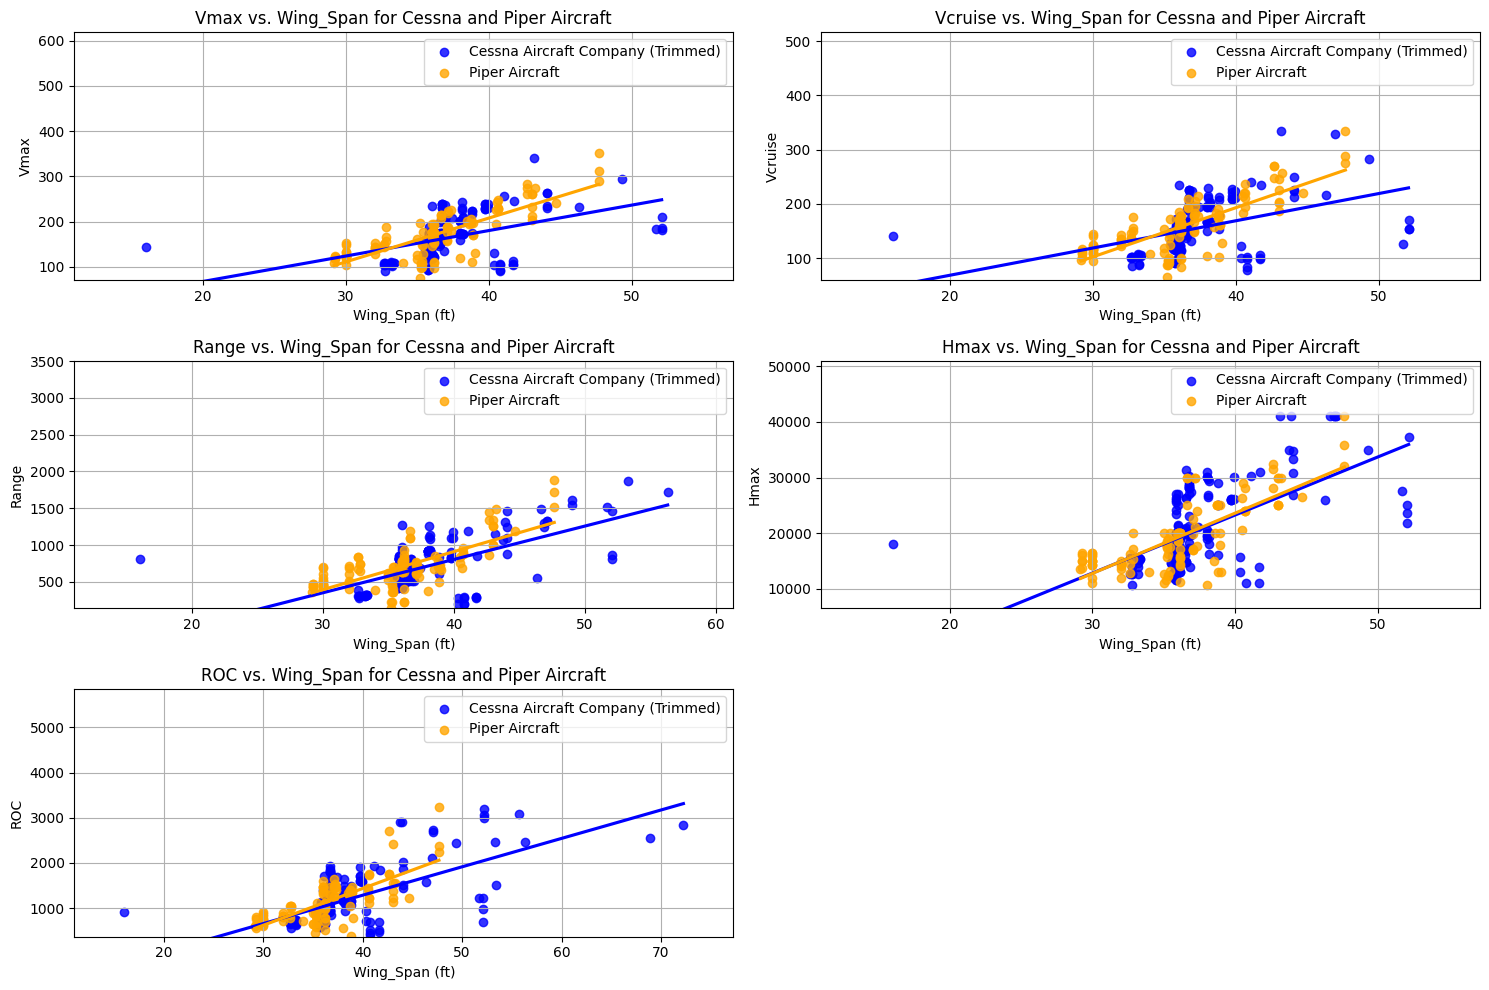

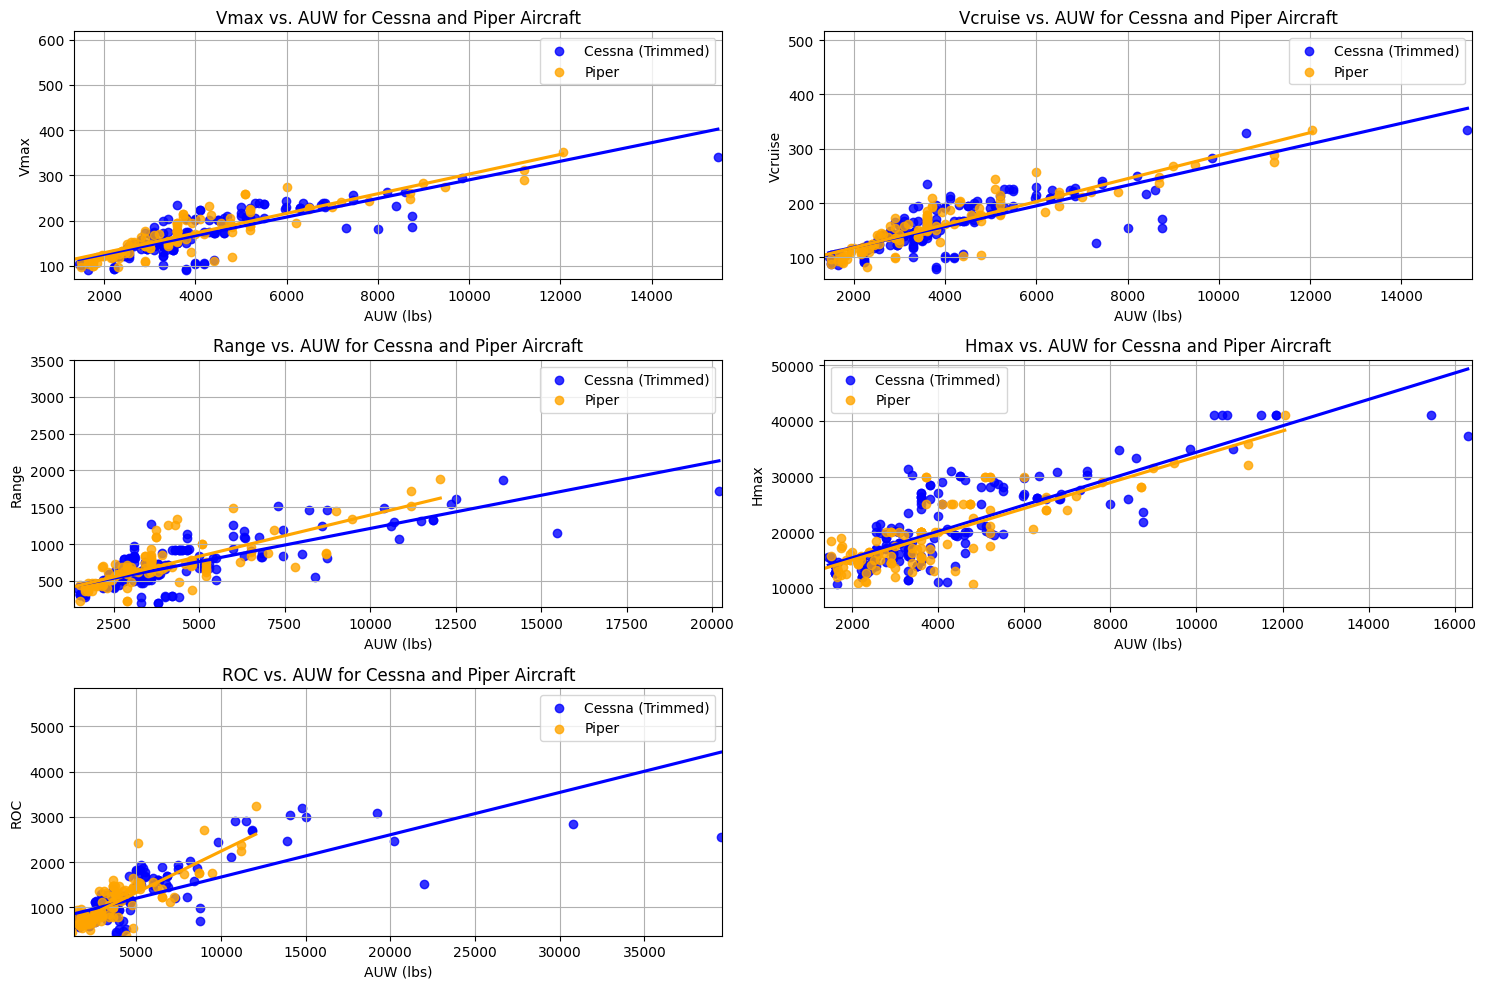

Cessna Aircraft Company (Vmax vs. Wing_Span) - Coefficient: 12.37, Intercept: -287.80
Cessna Aircraft Company (Vmax vs. AUW) - Coefficient: 0.02, Intercept: 98.55
Piper Aircraft (Vmax vs. Wing_Span) - Coefficient: 9.68, Intercept: -179.41
Piper Aircraft (Vmax vs. AUW) - Coefficient: 0.02, Intercept: 85.74
Cessna Aircraft Company (Vcruise vs. Wing_Span) - Coefficient: 9.52, Intercept: -194.61
Cessna Aircraft Company (Vcruise vs. AUW) - Coefficient: 0.01, Intercept: 100.54
Piper Aircraft (Vcruise vs. Wing_Span) - Coefficient: 9.05, Intercept: -169.20
Piper Aircraft (Vcruise vs. AUW) - Coefficient: 0.02, Intercept: 75.52
Cessna Aircraft Company (Range vs. Wing_Span) - Coefficient: 65.70, Intercept: -1759.48
Cessna Aircraft Company (Range vs. AUW) - Coefficient: 0.10, Intercept: 301.65
Piper Aircraft (Range vs. Wing_Span) - Coefficient: 51.63, Intercept: -1154.59
Piper Aircraft (Range vs. AUW) - Coefficient: 0.11, Intercept: 273.87
Cessna Aircraft Company (Hmax vs. Wing_Span) - Coefficient

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming df is defined before this cell and contains the relevant data.

# Step 1: Filter data for Cessna and Piper
filtered_df = df[df['Company'].isin(['Cessna Aircraft Company', 'Piper Aircraft'])]

# Check the filtered DataFrame
print(filtered_df)

# Parameters to plot
parameters = ['Vmax', 'Vcruise', 'Range', 'Hmax', 'ROC']

# Function to trim Cessna data based on Piper data ranges
def trim_cessna_data(piper_data, cessna_data, param):
    piper_min = piper_data[param].min()
    piper_max = piper_data[param].max()
    return cessna_data[(cessna_data[param] >= piper_min) & (cessna_data[param] <= piper_max)]

# Plotting for Wingspan
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters, start=1):
    plt.subplot(3, 2, i)

    # Get Piper data for the parameter
    piper_data = filtered_df[filtered_df['Company'] == 'Piper Aircraft']
    
    # Trim Cessna data for fair comparison
    cessna_data_trimmed = trim_cessna_data(piper_data, 
                                            filtered_df[filtered_df['Company'] == 'Cessna Aircraft Company'], 
                                            param)

    # Create a scatter plot with regression lines for trimmed Cessna
    sns.regplot(data=cessna_data_trimmed,
                x='Wing_Span', y=param,
                label='Cessna Aircraft Company (Trimmed)', color='blue', ci=None)

    # Create a scatter plot with regression lines for Piper
    sns.regplot(data=piper_data,
                x='Wing_Span', y=param,
                label='Piper Aircraft', color='orange', ci=None)

    # Set limits based on trimmed data
    plt.xlim(cessna_data_trimmed['Wing_Span'].min() - 5, cessna_data_trimmed['Wing_Span'].max() + 5)
    plt.ylim(filtered_df[param].min() - 5, filtered_df[param].max() + 5)

    # Add titles and labels
    plt.title(f'{param} vs. Wing_Span for Cessna and Piper Aircraft')
    plt.xlabel('Wing_Span (ft)')
    plt.ylabel(param)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Plotting for AUW
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters, start=1):
    plt.subplot(3, 2, i)

    # Trim Cessna data for fair comparison based on Piper data
    cessna_data_trimmed_auw = trim_cessna_data(piper_data, 
                                                filtered_df[filtered_df['Company'] == 'Cessna Aircraft Company'], 
                                                param)

    # Create a scatter plot with regression lines for trimmed Cessna
    sns.regplot(data=cessna_data_trimmed_auw,
                x='AUW', y=param,
                label='Cessna (Trimmed)', color='blue', ci=None)

    # Create a scatter plot with regression lines for Piper
    sns.regplot(data=piper_data,
                x='AUW', y=param,
                label='Piper', color='orange', ci=None)

    # Set limits based on trimmed data
    plt.xlim(cessna_data_trimmed_auw['AUW'].min() - 100, cessna_data_trimmed_auw['AUW'].max() + 100)
    plt.ylim(filtered_df[param].min() - 5, filtered_df[param].max() + 5)

    # Add titles and labels
    plt.title(f'{param} vs. AUW for Cessna and Piper Aircraft')
    plt.xlabel('AUW (lbs)')
    plt.ylabel(param)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Optional: Compare regression coefficients for each parameter
for param in parameters:
    for company in ['Cessna Aircraft Company', 'Piper Aircraft']:
        if company == 'Cessna Aircraft Company':
            X_wing_Span = cessna_data_trimmed['Wing_Span'].values.reshape(-1, 1)
            y_param = cessna_data_trimmed[param].values
        else:
            X_wing_Span = piper_data['Wing_Span'].values.reshape(-1, 1)
            y_param = piper_data[param].values
        
        model_wing_Span = LinearRegression().fit(X_wing_Span, y_param)
        print(f"{company} ({param} vs. Wing_Span) - Coefficient: {model_wing_Span.coef_[0]:.2f}, Intercept: {model_wing_Span.intercept_:.2f}")

        if company == 'Cessna Aircraft Company':
            X_auw = cessna_data_trimmed['AUW'].values.reshape(-1, 1)
        else:
            X_auw = piper_data['AUW'].values.reshape(-1, 1)
        
        model_auw = LinearRegression().fit(X_auw, y_param)
        print(f"{company} ({param} vs. AUW) - Coefficient: {model_auw.coef_[0]:.2f}, Intercept: {model_auw.intercept_:.2f}")


---

## Range dependencie on proportion of fuel Weight

The Range Equation (derived from the Breguet equations) include the proportion of the fuel weight to the overal weight of the aircraft. It measures this by the relationship between the initial weight of the aircraft (before take off) to the weight of the airplane (after landing) after the fuel has been burned off.
A very interesting pattern emerges where it is not linear but also not exponential, rather a sort of two-phased linearity with one slope up untill a 'Wi/Wf' 1.35 after which the slope changes abruptly. Perhaps the reason for this suprise pattern lies in the the Engine types. This would warrant the same ploit to be printed with the different Engine types separatly!

<img src="/workspace/data-driven-design/images_notebook/range_eq.png" alt="Range Equationr" height="300" />

                 Model             Company  Wing_Span     Length     Height  \
0          15 AC Sedan             Aeronca  37.416667  25.250000  10.250000   
1    11 CC Super Chief             Aeronca  36.083333  20.583333   8.750000   
2          7 CCM Champ             Aeronca  35.000000  21.416667   8.583333   
3           7 DC Champ             Aeronca  35.000000  21.416667   8.583333   
4           7 AC Champ             Aeronca  35.000000  21.416667   8.750000   
..                 ...                 ...        ...        ...        ...   
852              500 A  Twin Commander A/C  49.416667  35.083333  14.416667   
853                500  Twin Commander A/C  49.000000  35.083333  14.416667   
854                520  Twin Commander A/C  44.083333  35.416667  14.416667   
855               2180               Varga  30.000000  21.166667   7.000000   
856      2150A Kachina               Varga  30.000000  21.166667   7.000000   

     Multi_Engine  TP_mods  Engine_Type  THR    SHP

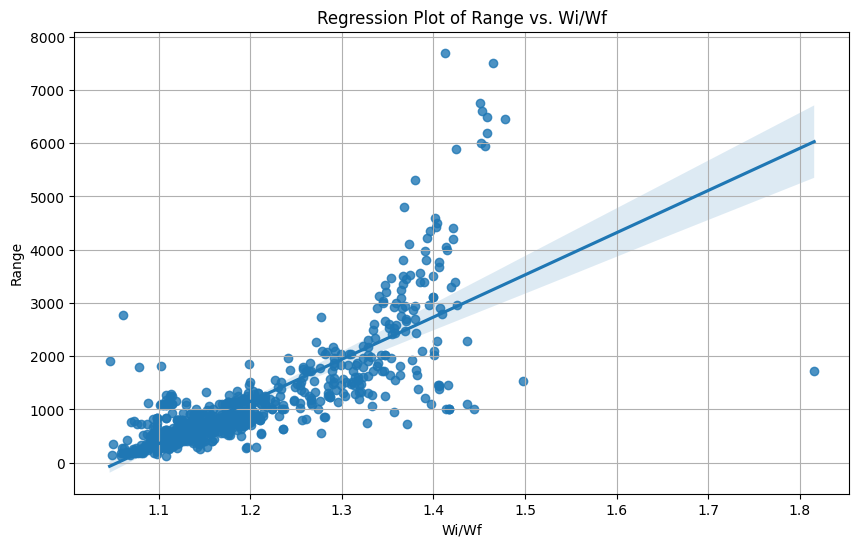

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate Wi / Wf based on the formula
# Wi = AUW + FW, Wf = AUW
df['Wi/Wf'] = (df['AUW'] + df['FW']) / df['AUW']

# Print the DataFrame with the new feature
print(df)

# Create a regression plot using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Wi/Wf', y='Range', data=df)
plt.title('Regression Plot of Range vs. Wi/Wf')
plt.xlabel('Wi/Wf')
plt.ylabel('Range')
plt.grid()
plt.show()


---

## Celing as a function of Wing Span

Lissaman